# Base Functionalities for MS-based proteomics

### Alternative: AlphaBase can generate theoretical/predicted MS coordinates for precursors and fragments that belong to peptide sequences

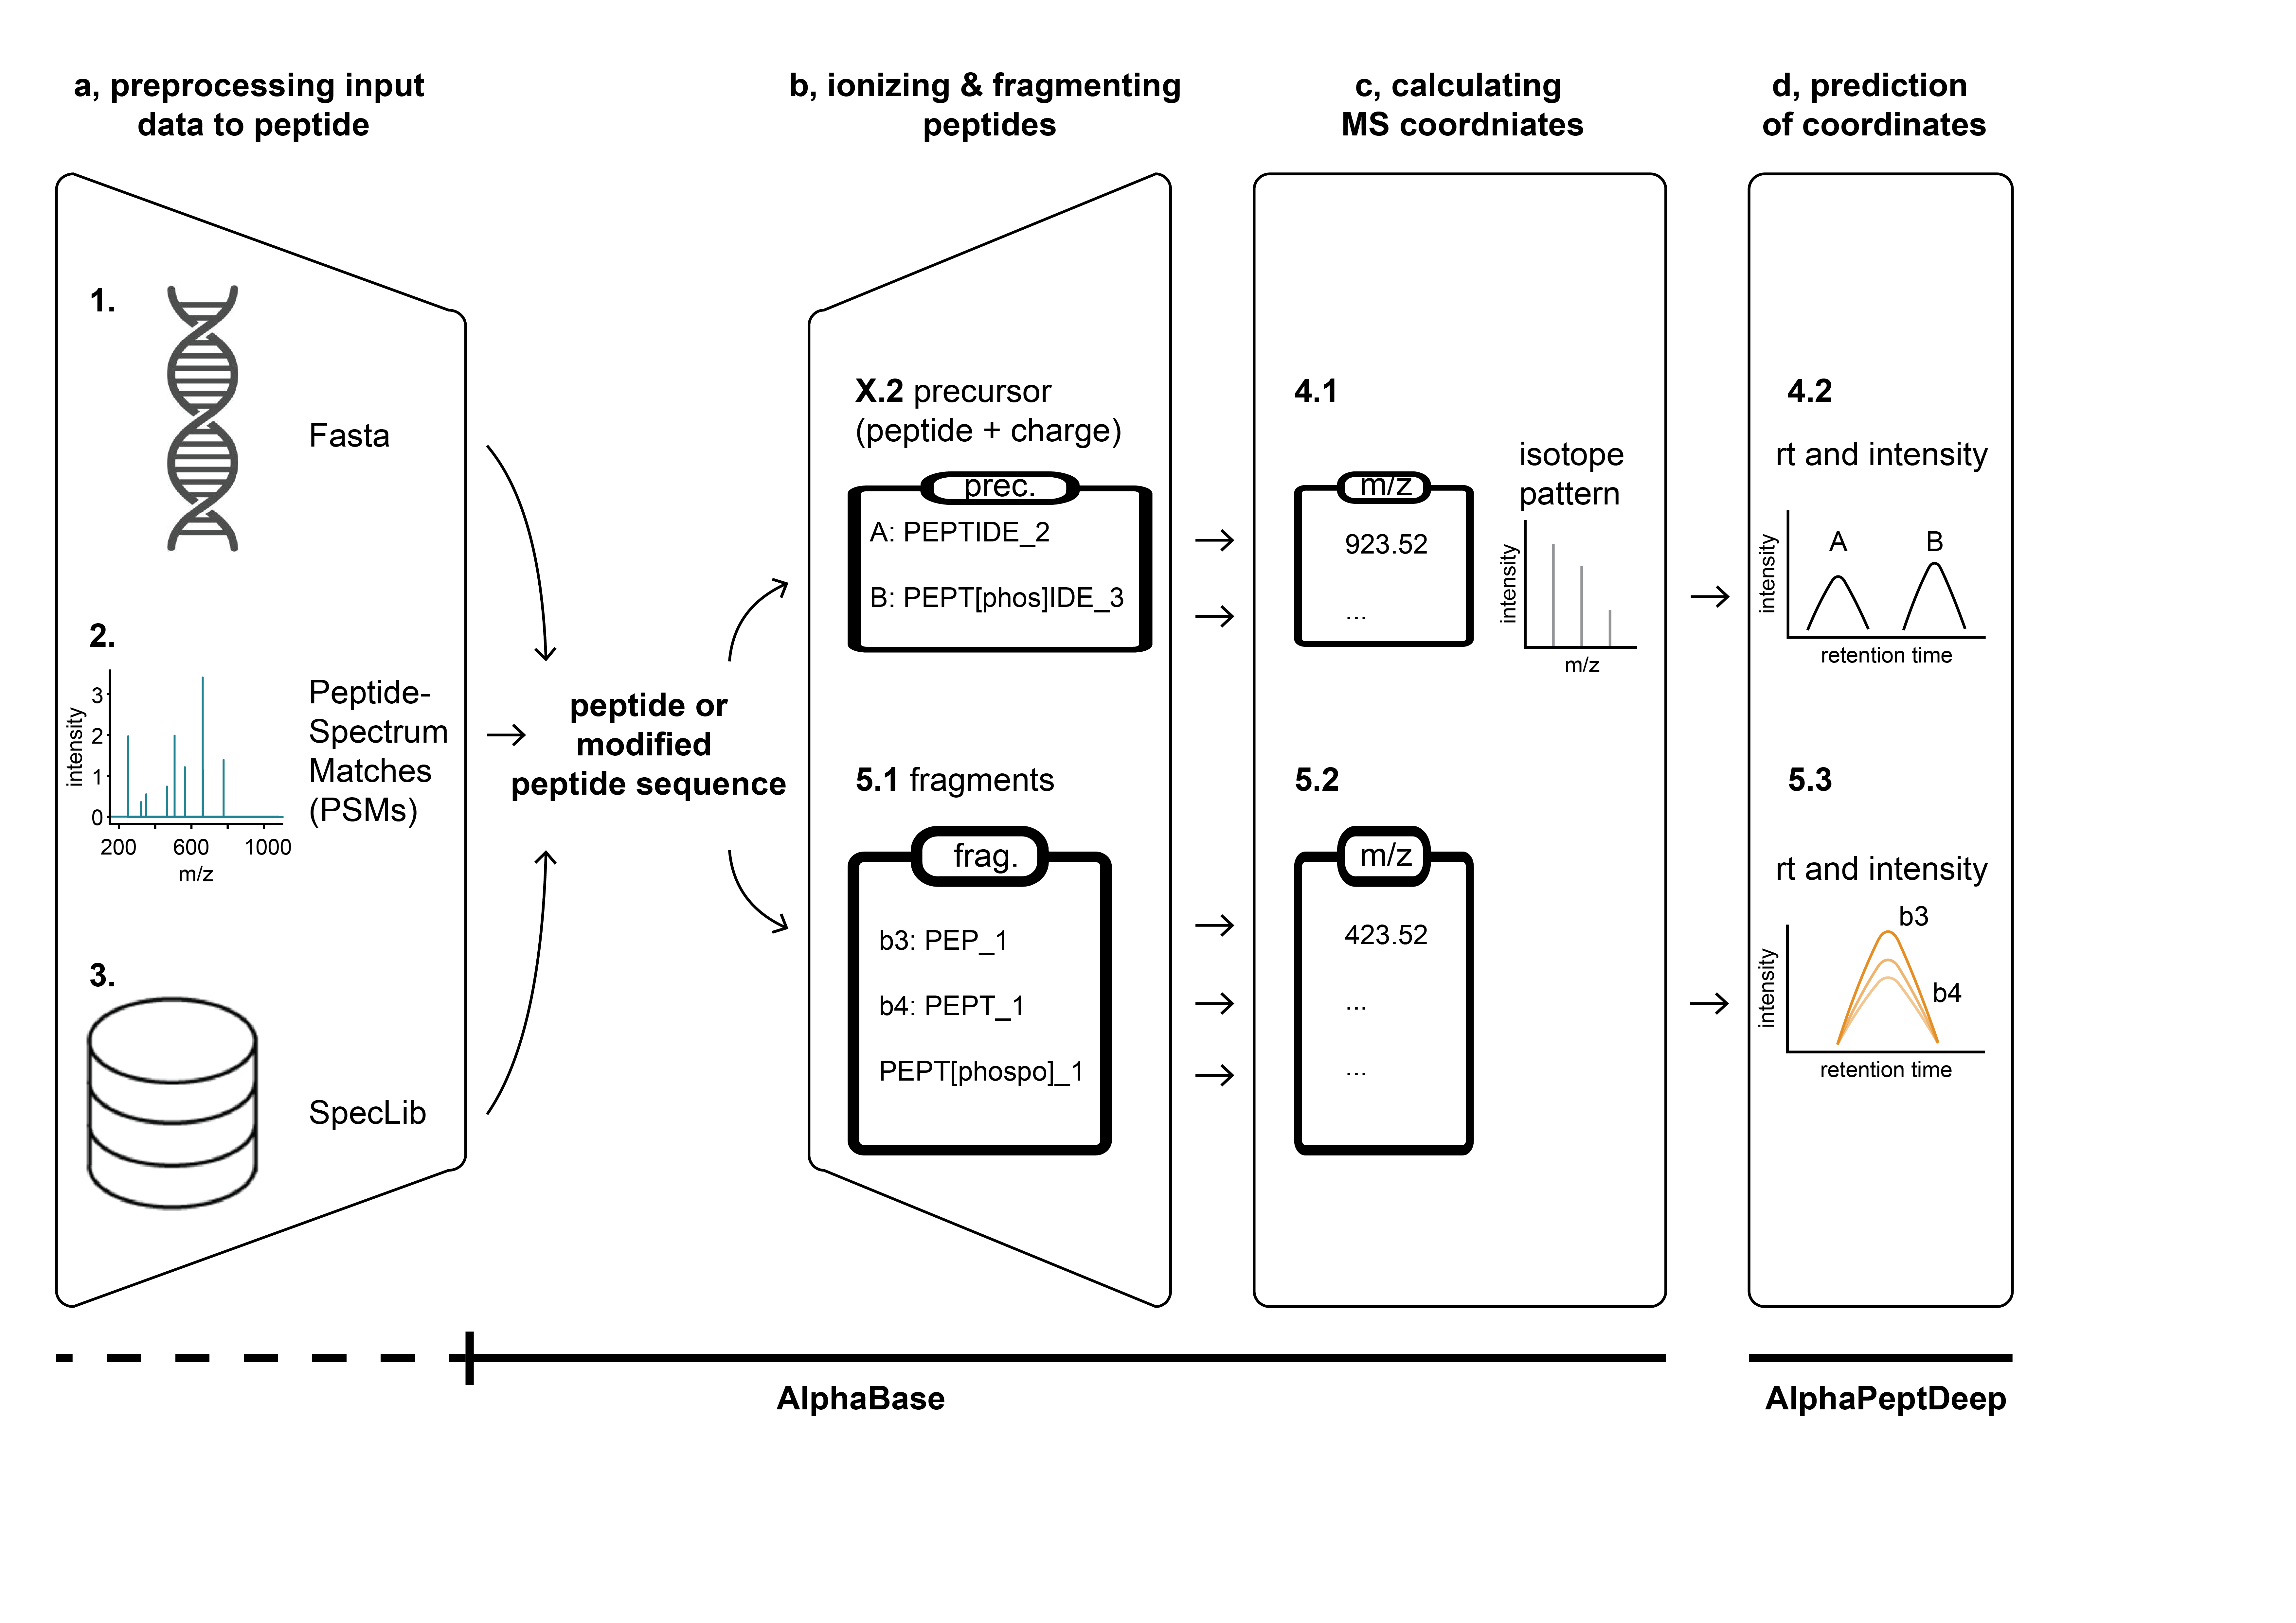

In [1]:
from IPython.display import Image
Image(filename='data/AlphaBase_figure1-01.png')

## 1. From Fasta to MS coordinates for (modified) peptide sequences

### 1.1 From Fasta file to (modified) peptide sequences

`alphabase.alphabase.protein.fasta.SpecLibFasta` provides functionalities to generate (modified) peptides sequences from the given fasta

In [2]:
from alphabase.protein.fasta import SpecLibFasta

# The SpecLibFasta will do following for us:
# - Load fasta files into a protein_dict
# - Digest proteins into peptide sequences
# - Append decoy peptide sequences if self.decoy is not None
# - Add fixed and variable modifications
# - [Add special modifications]
# - [Add peptide labeling]
# - Add charge states to peptides

# define how the fasta file should be digested to peptides
fasta_lib = SpecLibFasta(
    charged_frag_types = ["b_z1", "b_z2", "y_z1", "y_z2"],
    protease = "trypsin",
    max_missed_cleavages = 2,
    peptide_length_min = 7,
    peptide_length_max = 35,
    precursor_charge_min = 2,
    precursor_charge_max = 4,
    precursor_mz_min = 400.0,
    precursor_mz_max = 2000.0,
    var_mods = ["Acetyl@Protein_N-term", "Oxidation@M"],
    min_var_mod_num = 0,
    max_var_mod_num = 2,
    fix_mods = ["Carbamidomethyl@C"],
    labeling_channels = None,
    special_mods = [],
    min_special_mod_num = 0,
    max_special_mod_num = 1,
    special_mods_cannot_modify_pep_n_term = False,
    special_mods_cannot_modify_pep_c_term = False,
    decoy = None,
    include_contaminants = False,
    I_to_L = False,
)

# fastalib.import_and_process_fasta(fasta_files=[...])

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [3]:
# define the path to a fasta file
fasta_files = ["data/sample_proteins.fasta"]

# generate a list of peptide sequences based on the fasta file
fasta_lib.get_peptides_from_fasta(fasta_files) 

# add the columns: protein and gene names
fasta_lib.append_protein_name() 

# add sequences with variable and fixed modifications
fasta_lib.add_modifications() 

fasta_lib.precursor_df

,sequence,protein_idxes,miss_cleavage,is_prot_nterm,is_prot_cterm,mods,mod_sites,nAA,proteins,genes
0,EAKPPKK,5,2,False,False,,,7,A0A0U1RRE5,NBDY
1,VLEGRFR,2,1,False,False,,,7,A0A0B4J2F2,SIK1B
2,LESSQPR,7,0,False,False,,,7,A0AV02,SLC12A8
3,FSVSTLR,0,0,False,False,,,7,A0A087X1C5,CYP2D7
4,AFRQQLR,2,1,False,False,,,7,A0A0B4J2F2,SIK1B
...,...,...,...,...,...,...,...,...,...,...
1000,IQAVLAVQGPLLLSRDPAQYCHAVWGDPDSPNYHR,6,1,False,False,Carbamidomethyl@C,21,35,A0A1B0GTW7,CIROP
1001,LARLAPGCEPLGLLQGDCEMEDLMPCSLGTFVLVQ,2,1,False,True,Oxidation@M;Carbamidomethyl@C;Carbamidomethyl@...,20;8;18;26,35,A0A0B4J2F2,SIK1B
1002,LARLAPGCEPLGLLQGDCEMEDLMPCSLGTFVLVQ,2,1,False,True,Oxidation@M;Carbamidomethyl@C;Carbamidomethyl@...,24;8;18;26,35,A0A0B4J2F2,SIK1B
1003,LARLAPGCEPLGLLQGDCEMEDLMPCSLGTFVLVQ,2,1,False,True,Oxidation@M;Oxidation@M;Carbamidomethyl@C;Carb...,20;24;8;18;26,35,A0A0B4J2F2,SIK1B


In [4]:
# Add phospho as modification to the peptide sequences

from alphabase.protein.fasta import append_special_modifications

fasta_lib._precursor_df = append_special_modifications(
    fasta_lib.precursor_df, ['Phospho@S','Phospho@T'],
    min_mod_num=0, max_mod_num=1, max_peptidoform_num=100
)
fasta_lib.precursor_df

,sequence,protein_idxes,miss_cleavage,is_prot_nterm,is_prot_cterm,mods,mod_sites,nAA,proteins,genes
0,EAKPPKK,5,2,False,False,,,7,A0A0U1RRE5,NBDY
1,VLEGRFR,2,1,False,False,,,7,A0A0B4J2F2,SIK1B
2,LESSQPR,7,0,False,False,Phospho@S,3,7,A0AV02,SLC12A8
3,LESSQPR,7,0,False,False,Phospho@S,4,7,A0AV02,SLC12A8
4,LESSQPR,7,0,False,False,,,7,A0AV02,SLC12A8
...,...,...,...,...,...,...,...,...,...,...
3006,LARLAPGCEPLGLLQGDCEMEDLMPCSLGTFVLVQ,2,1,False,True,Oxidation@M;Oxidation@M;Carbamidomethyl@C;Carb...,20;24;8;18;26;30,35,A0A0B4J2F2,SIK1B
3007,LARLAPGCEPLGLLQGDCEMEDLMPCSLGTFVLVQ,2,1,False,True,Oxidation@M;Oxidation@M;Carbamidomethyl@C;Carb...,20;24;8;18;26,35,A0A0B4J2F2,SIK1B
3008,LARLAPGCEPLGLLQGDCEMEDLMPCSLGTFVLVQ,2,1,False,True,Carbamidomethyl@C;Carbamidomethyl@C;Carbamidom...,8;18;26;27,35,A0A0B4J2F2,SIK1B
3009,LARLAPGCEPLGLLQGDCEMEDLMPCSLGTFVLVQ,2,1,False,True,Carbamidomethyl@C;Carbamidomethyl@C;Carbamidom...,8;18;26;30,35,A0A0B4J2F2,SIK1B


In [5]:
fasta_lib.decoy = 'diann'
fasta_lib.append_decoy_sequence()
fasta_lib.precursor_df.sample(5, random_state=0)

,sequence,protein_idxes,miss_cleavage,is_prot_nterm,is_prot_cterm,mods,mod_sites,nAA,proteins,genes,decoy
5151,SEGTQPEGTYGEQLVPELCNQSESSGEDFFLK,7,0,False,False,Carbamidomethyl@C,19,32,A0AV02,SLC12A8,0
2088,VTEGVLDVIVYASAADKMK,8,1,False,False,Oxidation@M,18,19,A0AV96,RBM47,0
3145,ENQEGLAEAVLEALASKGGTLR,6,1,False,False,Phospho@S,16,22,A0A1B0GTW7,CIROP,1
4230,ATPGLHLGSASNFSFFRWMRSLLLPSSR,7,2,False,False,Carbamidomethyl@C,27,28,A0AV02,SLC12A8,1
1519,VSPGCPIVGTHVCPVR,0,0,False,False,Carbamidomethyl@C;Carbamidomethyl@C;Phospho@T,5;13;10,16,A0A087X1C5,CYP2D7,0


### 1.2 From (modified) peptide sequences to precursors (peptide sequence & charge state)

In [6]:
fasta_lib.add_charge()
fasta_lib.precursor_df[['sequence','mods','mod_sites','charge']]

,sequence,mods,mod_sites,charge
0,EAKPPKK,,,2
1,EAKPPKK,,,3
2,EAKPPKK,,,4
3,FDYDDLR,,,2
4,FDYDDLR,,,3
...,...,...,...,...
18061,SLRSPQEQIILAPSLAKVDMEMTQLTQENADFATR,Phospho@S,1,3
18062,SLRSPQEQIILAPSLAKVDMEMTQLTQENADFATR,Phospho@S,1,4
18063,LLRLAPGCEPLGLLQGDCEMEDLMPCSLGTFVLLQ,Carbamidomethyl@C;Carbamidomethyl@C;Carbamidom...,8;18;26,2
18064,LLRLAPGCEPLGLLQGDCEMEDLMPCSLGTFVLLQ,Carbamidomethyl@C;Carbamidomethyl@C;Carbamidom...,8;18;26,3


## 2. From PSM file to MS coordinates

In [7]:
from alphabase.psm_reader import (
    # DDA
    AlphaPeptReader,
    pFindReader,
    MaxQuantReader,
    SageReaderTSV,
    SageReaderParquet,
    MSFragger_PSM_TSV_Reader,
    MSFraggerPepXML,
    # DIA
    DiannReader,
    SpectronautReader,
    SpectronautReportReader,
    SwathReader,
)

### 2.1 & 2.2 From PSM file to peptide / modified peptide sequences & to precursors

`alphabase.psm_reader.psm_reader_provider` has basic reader classes for several search engine results

In [8]:
from alphabase.psm_reader import psm_reader_provider

psm_reader_provider.reader_dict

{'alphapept': alphabase.psm_reader.alphapept_reader.AlphaPeptReader,
 'spectronaut': alphabase.psm_reader.dia_psm_reader.SpectronautReader,
 'speclib_tsv': alphabase.psm_reader.dia_psm_reader.SpectronautReader,
 'openswath': alphabase.psm_reader.dia_psm_reader.SwathReader,
 'swath': alphabase.psm_reader.dia_psm_reader.SwathReader,
 'diann': alphabase.psm_reader.dia_psm_reader.DiannReader,
 'spectronaut_report': alphabase.psm_reader.dia_psm_reader.SpectronautReportReader,
 'msfragger_psm_tsv': alphabase.psm_reader.msfragger_reader.MSFragger_PSM_TSV_Reader,
 'msfragger': alphabase.psm_reader.msfragger_reader.MSFragger_PSM_TSV_Reader,
 'msfragger_pepxml': alphabase.psm_reader.msfragger_reader.MSFraggerPepXML,
 'maxquant': alphabase.psm_reader.maxquant_reader.MaxQuantReader,
 'pfind': alphabase.psm_reader.pfind_reader.pFindReader,
 'pfind3': alphabase.psm_reader.pfind_reader.pFindReader,
 'sage_tsv': alphabase.psm_reader.sage_reader.SageReaderTSV,
 'sage_parquet': alphabase.psm_reader.sage

In [9]:
""" 
DIA-NN does not provide the m/zs for precursors and fragments by default. Therefore, you might want to calculate the MS 
coordinates yourself based on the (modified) peptide sequences as illustraded below.
"""

tsv_file = "data/sample_diann_report.tsv"
diann_psm_df  = psm_reader_provider.get_reader('diann').import_file(tsv_file)
diann_psm_df 

,sequence,charge,rt,rt_start,rt_stop,proteins,uniprot_ids,genes,score,fdr,mods,mod_sites,nAA,rt_norm,precursor_mz
0,AAAALAGGK,1,3.47307,3.40655,3.56173,RS25A_YEAST;RS25B_YEAST,P0C0T4;Q3E792,RPS25A;RPS25B,0.962915,0.001802,,,9,0.163665,729.425365
1,AAAALAGGK,1,3.42883,3.36235,3.49533,RS25A_YEAST;RS25B_YEAST,P0C0T4;Q3E792,RPS25A;RPS25B,0.959377,0.005249,,,9,0.161580,729.425365
2,AAAALAGGK,1,3.47295,3.40648,3.53945,RS25A_YEAST;RS25B_YEAST,P0C0T4;Q3E792,RPS25A;RPS25B,0.958271,0.002336,,,9,0.163659,729.425365
3,AAELDVLNDPK,2,11.06870,10.84710,11.31240,IF5_YEAST,P38431,TIF5,0.958292,0.002336,,,11,0.521602,592.811510
4,AAELDVLNDPK,2,10.62560,10.44830,11.00230,IF5_YEAST,P38431,TIF5,0.960787,0.003226,,,11,0.500721,592.811510
5,AAELDVLNDPK,2,10.42620,10.24890,10.82510,IF5_YEAST,P38431,TIF5,0.963015,0.001802,,,11,0.491324,592.811510
6,AAEEAGVTDVK,2,3.55395,3.46528,3.68688,FAS2_YEAST,P19097,FAS2,0.958014,0.003311,,,11,0.167476,545.274761
7,AAEEAGVTDVK,2,3.50980,3.42117,3.59847,FAS2_YEAST,P19097,FAS2,0.960638,0.003546,,,11,0.165396,545.274761
8,AAEEAGVTDVK,2,3.55405,3.48755,3.70915,FAS2_YEAST,P19097,FAS2,0.962748,0.001802,,,11,0.167481,545.274761
9,AAEAATTDLTYR,2,4.57762,4.46682,4.71060,WTM1_YEAST,Q12363,WTM1,0.958327,0.002336,,,12,0.215716,641.817324


## 3. From already generated AlphaPeptDeep SpecLib file to peptide / modified peptide sequences

In [10]:
from alphabase.spectral_library.reader import SWATHLibraryReader

speclib_tsv = "data/sample_openswath.tsv"

speclib = SWATHLibraryReader()
speclib.load(speclib_tsv)
speclib.precursor_df

100%|██████████| 18/18 [00:00<00:00, 2920.71it/s]


,proteins,charge,mod_sites,nAA,sequence,mods,precursor_mz,rt,frag_start_idx,frag_stop_idx,rt_norm
0,1/iRT|iRT_Biognosys|iRT_Biognosys,2,,13,ADVTPADFSEWSK,,726.835714,55.0,0,12,0.575087
1,1/iRT|iRT_Biognosys|iRT_Biognosys,2,,13,DGLDAASYYAPVR,,699.338424,43.2,12,24,0.493426
2,1/iRT|iRT_Biognosys|iRT_Biognosys,2,,14,GAGSSEPVTGLDAK,,644.822606,0.5,24,37,0.197924
3,1/iRT|iRT_Biognosys|iRT_Biognosys,2,,12,GTFIIDPAAVIR,,636.869163,86.7,37,48,0.794464
4,1/iRT|iRT_Biognosys|iRT_Biognosys,2,,12,GTFIIDPGGVIR,,622.853512,71.4,48,59,0.688581
5,1/iRT|iRT_Biognosys|iRT_Biognosys,2,,14,LFLQFGAQGSPFLK,,776.929751,95.6,59,72,0.856055
6,1/iRT|iRT_Biognosys|iRT_Biognosys,2,,9,LGGNEQVTR,,487.256705,-28.1,72,80,0.000000
7,1/iRT|iRT_Biognosys|iRT_Biognosys,2,,12,TPVISGGPYEYR,,669.838059,29.0,80,91,0.395156
8,1/iRT|iRT_Biognosys|iRT_Biognosys,2,,12,TPVITGAPYEYR,,683.853710,33.6,91,102,0.426990
9,1/iRT|iRT_Biognosys|iRT_Biognosys,2,,13,VEATFGVDESNAK,,683.827889,13.1,102,114,0.285121


In [11]:
speclib.fragment_mz_df

,b_z1,b_z2,y_z1,y_z2,b_modloss_z1,b_modloss_z2,y_modloss_z1,y_modloss_z2
0,72.044388,36.525833,1381.627075,691.317139,0.0,0.0,0.0,0.0
1,187.071335,94.039307,1266.600098,633.803711,0.0,0.0,0.0,0.0
2,286.139740,143.573517,1167.531738,584.269470,0.0,0.0,0.0,0.0
3,387.187439,194.097351,1066.484009,533.745667,0.0,0.0,0.0,0.0
4,484.240204,242.623734,969.431213,485.219269,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
177,568.316345,284.661804,568.334106,284.670685,0.0,0.0,0.0,0.0
178,665.369080,333.188171,471.281311,236.144302,0.0,0.0,0.0,0.0
179,762.421875,381.714569,374.228577,187.617920,0.0,0.0,0.0,0.0
180,875.505920,438.256592,261.144501,131.075882,0.0,0.0,0.0,0.0


In [12]:
speclib.fragment_intensity_df

,b_z1,b_z2,y_z1,y_z2,b_modloss_z1,b_modloss_z2,y_modloss_z1,y_modloss_z2
0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0
1,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0
2,0.00000,0.00000,0.11792,0.00000,0.0,0.0,0.0,0.0
3,0.40285,0.00000,1.00000,0.21889,0.0,0.0,0.0,0.0
4,0.00000,0.00000,0.10353,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
177,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0
178,0.00000,0.00000,0.31061,0.00000,0.0,0.0,0.0,0.0
179,0.00000,0.26682,0.00000,0.00000,0.0,0.0,0.0,0.0
180,1.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0


## 4. Precursor functions based on dataframes (for all input data types)

### 4.1 From precursors to precursor m/zs and isotope patterns

`alphabase.peptide.precursor.calc_precursor_mz()`

`alphabase.peptide.precursor.calc_precursor_isotope_intensity()`

In [13]:
from alphabase.peptide.precursor import update_precursor_mz
update_precursor_mz(diann_psm_df)

,sequence,charge,rt,rt_start,rt_stop,proteins,uniprot_ids,genes,score,fdr,mods,mod_sites,nAA,rt_norm,precursor_mz
0,AAAALAGGK,1,3.47307,3.40655,3.56173,RS25A_YEAST;RS25B_YEAST,P0C0T4;Q3E792,RPS25A;RPS25B,0.962915,0.001802,,,9,0.163665,729.425365
1,AAAALAGGK,1,3.42883,3.36235,3.49533,RS25A_YEAST;RS25B_YEAST,P0C0T4;Q3E792,RPS25A;RPS25B,0.959377,0.005249,,,9,0.161580,729.425365
2,AAAALAGGK,1,3.47295,3.40648,3.53945,RS25A_YEAST;RS25B_YEAST,P0C0T4;Q3E792,RPS25A;RPS25B,0.958271,0.002336,,,9,0.163659,729.425365
3,AAELDVLNDPK,2,11.06870,10.84710,11.31240,IF5_YEAST,P38431,TIF5,0.958292,0.002336,,,11,0.521602,592.811510
4,AAELDVLNDPK,2,10.62560,10.44830,11.00230,IF5_YEAST,P38431,TIF5,0.960787,0.003226,,,11,0.500721,592.811510
5,AAELDVLNDPK,2,10.42620,10.24890,10.82510,IF5_YEAST,P38431,TIF5,0.963015,0.001802,,,11,0.491324,592.811510
6,AAEEAGVTDVK,2,3.55395,3.46528,3.68688,FAS2_YEAST,P19097,FAS2,0.958014,0.003311,,,11,0.167476,545.274761
7,AAEEAGVTDVK,2,3.50980,3.42117,3.59847,FAS2_YEAST,P19097,FAS2,0.960638,0.003546,,,11,0.165396,545.274761
8,AAEEAGVTDVK,2,3.55405,3.48755,3.70915,FAS2_YEAST,P19097,FAS2,0.962748,0.001802,,,11,0.167481,545.274761
9,AAEAATTDLTYR,2,4.57762,4.46682,4.71060,WTM1_YEAST,Q12363,WTM1,0.958327,0.002336,,,12,0.215716,641.817324


In [14]:
from alphabase.peptide.precursor import calc_precursor_isotope_intensity

calc_precursor_isotope_intensity(diann_psm_df)
diann_psm_df[['precursor_mz']+[col for col in diann_psm_df.columns if col.startswith('i_')]]

,precursor_mz,i_0,i_1,i_2,i_3,i_4,i_5
0,729.425365,0.671756,0.256248,0.060035,0.010476,0.001486,0.000000
1,729.425365,0.671756,0.256248,0.060035,0.010476,0.001486,0.000000
2,729.425365,0.671756,0.256248,0.060035,0.010476,0.001486,0.000000
3,592.811510,0.522489,0.321591,0.116691,0.031217,0.006764,0.001247
4,592.811510,0.522489,0.321591,0.116691,0.031217,0.006764,0.001247
5,592.811510,0.522489,0.321591,0.116691,0.031217,0.006764,0.001247
6,545.274761,0.560414,0.305938,0.102717,0.025685,0.005246,0.000000
7,545.274761,0.560414,0.305938,0.102717,0.025685,0.005246,0.000000
8,545.274761,0.560414,0.305938,0.102717,0.025685,0.005246,0.000000
9,641.817324,0.499714,0.327934,0.126511,0.035950,0.008272,0.001619


### 4.2 From precursor to retention times and intensities

In [15]:
# todo AlphaPeptDeep

## 5. Fragment functions based on dataframes (for all input data types)

### 5.1 From (modified) peptide sequences to fragments

In [16]:
# @Feng: Is this implemented?

### 5.2 From fragments to fragment m/zs

`alphabase.peptide.fragment.create_fragment_mz_dataframe()`

In [17]:
from alphabase.peptide.fragment import create_fragment_mz_dataframe

In [18]:
fragment_mz_df = create_fragment_mz_dataframe(diann_psm_df, charged_frag_types = ["b_z1", "b_z2", "y_z1", "y_z2"])
fragment_mz_df

,b_z1,b_z2,y_z1,y_z2
0,72.044388,0.000000,658.388245,0.000000
1,143.081497,0.000000,587.351135,0.000000
2,214.118622,0.000000,516.314026,0.000000
3,285.155731,0.000000,445.276917,0.000000
4,398.239807,0.000000,332.192841,0.000000
...,...,...,...,...
203,701.310059,351.158661,641.329346,321.168304
204,848.378479,424.692871,494.260925,247.634094
205,1011.441772,506.224548,331.197601,166.102432
206,1108.494507,554.750916,234.144836,117.576057


In [19]:
# possible fragments for one precursor

start, end = diann_psm_df[['frag_start_idx','frag_stop_idx']].values[1]
fragment_mz_df.iloc[start:end,:]

,b_z1,b_z2,y_z1,y_z2
8,72.044388,0.0,658.388245,0.0
9,143.081497,0.0,587.351135,0.0
10,214.118622,0.0,516.314026,0.0
11,285.155731,0.0,445.276917,0.0
12,398.239807,0.0,332.192841,0.0
13,469.276917,0.0,261.155731,0.0
14,526.298401,0.0,204.134262,0.0
15,583.319824,0.0,147.112808,0.0


### 5.3 From fragments to retention times and intensities

In [20]:
import pandas as pd

df = pd.DataFrame({
    'sequence': ['ACDEFHIK', 'APDEFMNIK', 'SWDEFMNTIRAAAAKDDDDR'],
    'mods': ['Carbamidomethyl@C', '', 'Phospho@S;Oxidation@M'],
    'mod_sites': ['2', '', '1;6'],
    'charge': [1,2,3],
})
df

,sequence,mods,mod_sites,charge
0,ACDEFHIK,Carbamidomethyl@C,2,1
1,APDEFMNIK,,,2
2,SWDEFMNTIRAAAAKDDDDR,Phospho@S;Oxidation@M,1;6,3


### Protein processing

`alphabase.protein.fasta.Digest` class.

In [21]:
from alphabase.protein.fasta import Digest
import string

digest = Digest(
    protease="trypsin",
    max_missed_cleavages=2,
    peptide_length_min=7,
    peptide_length_max=45,
)
seqs, miss_cleaves, prot_nterms, prot_cterms = digest.cleave_sequence(string.ascii_uppercase)
seqs, miss_cleaves, prot_nterms, prot_cterms

(['ABCDEFGHIJK',
  'ABCDEFGHIJKLMNOPQR',
  'ABCDEFGHIJKLMNOPQRSTUVWXYZ',
  'LMNOPQR',
  'LMNOPQRSTUVWXYZ',
  'STUVWXYZ'],
 [0, 1, 2, 0, 1, 0],
 [True, True, True, False, False, False],
 [False, False, True, False, True, True])

Here are built-in protease dict for digestion, the digestion is actually performed by regular expression.

In [22]:
from alphabase.protein.fasta import protease_dict
protease_dict

{'arg-c': 'R',
 'asp-n': '\\w(?=D)',
 'bnps-skatole': 'W',
 'caspase 1': '(?<=[FWYL]\\w[HAT])D(?=[^PEDQKR])',
 'caspase 2': '(?<=DVA)D(?=[^PEDQKR])',
 'caspase 3': '(?<=DMQ)D(?=[^PEDQKR])',
 'caspase 4': '(?<=LEV)D(?=[^PEDQKR])',
 'caspase 5': '(?<=[LW]EH)D',
 'caspase 6': '(?<=VE[HI])D(?=[^PEDQKR])',
 'caspase 7': '(?<=DEV)D(?=[^PEDQKR])',
 'caspase 8': '(?<=[IL]ET)D(?=[^PEDQKR])',
 'caspase 9': '(?<=LEH)D',
 'caspase 10': '(?<=IEA)D',
 'chymotrypsin high specificity': '([FY](?=[^P]))|(W(?=[^MP]))',
 'chymotrypsin low specificity': '([FLY](?=[^P]))|(W(?=[^MP]))|(M(?=[^PY]))|(H(?=[^DMPW]))',
 'chymotrypsin': '([FLY](?=[^P]))|(W(?=[^MP]))|(M(?=[^PY]))|(H(?=[^DMPW]))',
 'clostripain': 'R',
 'cnbr': 'M',
 'enterokinase': '(?<=[DE]{3})K',
 'factor xa': '(?<=[AFGILTVM][DE]G)R',
 'formic acid': 'D',
 'glutamyl endopeptidase': 'E',
 'glu-c': 'E',
 'granzyme b': '(?<=IEP)D',
 'hydroxylamine': 'N(?=G)',
 'iodosobenzoic acid': 'W',
 'lys-c': 'K',
 'lys-n': '\\w(?=K)',
 'ntcb': '\\w(?=C)',
 'peps

We also support arbitray digestion if we design the correct regular expression, for example if we would like to combine `trypsin` (`[KR]`), `asp-n` (`\\w(?=D)`, cleave before `D`), and `lys-n` (`\\w(?=K)`, cleave before `K`), the final regular expression will be `([KR]|\\w(?=D)|\\w(?=K))`.

In [23]:
digest = Digest(
    protease="([KR]|\\w(?=D)|\\w(?=K))",
    max_missed_cleavages=2,
    peptide_length_min=7,
    peptide_length_max=45,
)
seqs, miss_cleaves, prot_nterms, prot_cterms = digest.cleave_sequence(string.ascii_uppercase)
seqs, miss_cleaves, prot_nterms, prot_cterms

(['ABCDEFGHIJ',
  'ABCDEFGHIJK',
  'DEFGHIJ',
  'DEFGHIJK',
  'DEFGHIJKLMNOPQR',
  'KLMNOPQR',
  'KLMNOPQRSTUVWXYZ',
  'LMNOPQR',
  'LMNOPQRSTUVWXYZ',
  'STUVWXYZ'],
 [1, 2, 0, 1, 2, 1, 2, 0, 1, 0],
 [True, True, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, True, False, True, True])

`SpecLibFasta` can supports all these possible digestion methods internally.

In [24]:
fasta_lib = SpecLibFasta(
    charged_frag_types = ["b_z1", "b_z2", "y_z1", "y_z2"],
    protease = "([KR]|\\w(?=D)|\\w(?=K))",
    max_missed_cleavages = 2,
    peptide_length_min = 7,
    peptide_length_max = 35,
    precursor_charge_min = 2,
    precursor_charge_max = 4,
    precursor_mz_min = 400.0,
    precursor_mz_max = 2000.0,
    var_mods = ["Acetyl@Protein_N-term", "Oxidation@M"],
    min_var_mod_num = 0,
    max_var_mod_num = 2,
    fix_mods = ["Carbamidomethyl@C"],
    labeling_channels = None,
    special_mods = [],
    min_special_mod_num = 0,
    max_special_mod_num = 1,
    special_mods_cannot_modify_pep_n_term = False,
    special_mods_cannot_modify_pep_c_term = False,
    decoy = None,
    include_contaminants = False,
    I_to_L = False,
)
fasta_lib.get_peptides_from_fasta(fasta_files)
fasta_lib.precursor_df

,sequence,protein_idxes,miss_cleavage,is_prot_nterm,is_prot_cterm,mods,mod_sites,nAA
0,LARHRVT,2,2,False,False,,,7
1,DGNMDIK,2,2,False,False,,,7
2,SHPPPPE,5,0,False,False,,,7
3,DGAQRTR,6,1,False,False,,,7
4,KVTEGVL,8,1,False,False,,,7
...,...,...,...,...,...,...,...,...
965,EYEGPQLDIWSLGVVLYVLVCGSLPFDGPNLPTLR,2,2,False,False,,,35
966,QVCQVPASRASRGGLSPFHAPAQSPGLHGGAAGSR,2,2,False,False,,,35
967,LASPFLGSQSATPVLQAQGGLGGAVLLPVSFQEGR,2,0,False,False,,,35
968,RHTLAEVSTRLSPLTAPCIVVSPSTTASPAEGTSS,2,2,False,False,,,35
